In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

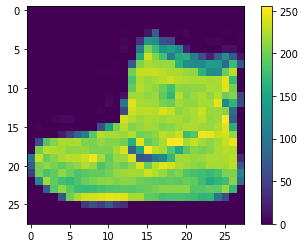

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

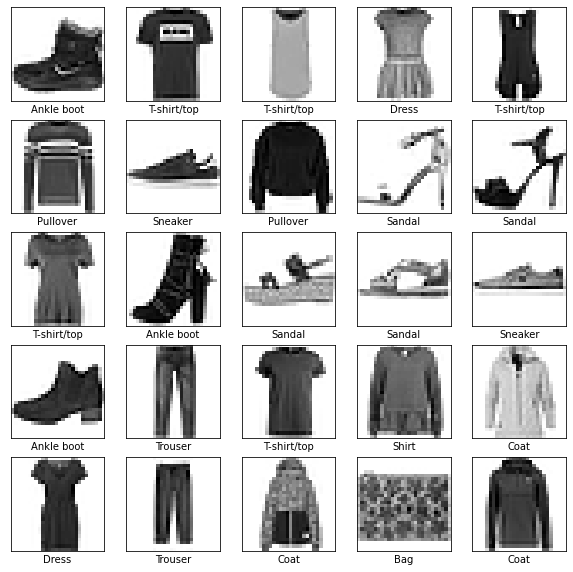

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4486 - accuracy: 0.8386
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3415 - accuracy: 0.8766
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3111 - accuracy: 0.8867
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2862 - accuracy: 0.8956
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2702 - accuracy: 0.9015
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2576 - accuracy: 0.9048
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2434 - accuracy: 0.9116
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2332 - accuracy: 0.9145
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2220 - accuracy: 0.9173
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [26]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 28, 256)           7424      
_________________________________________________________________
dense_17 (Dense)             (None, 28, 128)           32896     
_________________________________________________________________
dense_18 (Dense)             (None, 28, 64)            8256      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                17930     
Total params: 66,506
Trainable params: 66,506
Non-trainable params: 0
_________________________________________________________________


In [47]:
import tensorflow_hub as hub
import os

# Extract dense layers
image_input = model.get_layer(index=0).get_input_at(0)
feature_vector_output = model.get_layer(name='dense_18').get_output_at(0)
hub_model = tf.keras.Model(image_input, feature_vector_output)

# Exports a SavedModel.
hub_destination = 'MNIST'
hub_model.save(
  os.path.join(hub_destination, "feature-vector"), include_optimizer=False)

INFO:tensorflow:Assets written to: MNIST/feature-vector/assets


In [48]:
embed = hub.KerasLayer('MNIST/feature-vector', input_shape=(28, 28))

In [49]:
model_new = tf.keras.Sequential([
    embed,
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_14 (KerasLayer)  (None, 28, 64)            48576     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                57376     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 106,282
Trainable params: 57,706
Non-trainable params: 48,576
_________________________________________________________________


In [45]:
48576 == 7424 + 32896 + 8256

True

In [50]:
model_new.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model_new.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
probability_model = tf.keras.Sequential([model_new, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5870 - accuracy: 0.8835
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5533 - accuracy: 0.9103
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 1.5436 - accuracy: 0.9198
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5382 - accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5335 - accuracy: 0.9293
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5300 - accuracy: 0.9324
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5279 - accuracy: 0.9341
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5243 - accuracy: 0.9381
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5218 - accuracy: 0.9406
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.51